In [2]:
from EXPERIMENT_BIPARTITE import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from _CommunityDetect import *
from spectralOperator import BetheHessian
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [3]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

In [5]:
# For big n
n1 = n2 = 3000
k1 = k2 = 3
WithlambdaB = True
Htype=0
fileID = 'amiExp24.6.7' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroupsWBH'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=12)

A_ami, A_numGroup, Ahalf1_ami, Ahalf1_numGroup, Ahalf2_ami, Ahalf2_numGroup, BBT_ami, BBT_numGroup, BTB_ami, BTB_numGroup, Combine_ami, Combine_numGroup = \
results[0], results[1], results[2], results[3], results[4], results[5], results[6], results[7], results[8], results[9], results[10], results[11]

In [18]:
bipartite_random_partition = np.array([0] * n1 + [1] * n2)
print(np.unique(bipartite_random_partition, return_counts=True))
realGroupSize = [int(n1/k1) for i in range(k1)] + [int(n2/k2) for i in range(k2)]
bipartite_real_partition = []
for i in range(len(realGroupSize)):
    bipartite_real_partition += [i] * realGroupSize[i]
bipartite_real_partition = np.array(bipartite_real_partition)
print(np.unique(bipartite_real_partition, return_counts=True))

# bipartite_random_partition = np.copy(bipartite_real_partition)
# np.random.shuffle(bipartite_random_partition[:n1])
# np.random.shuffle(bipartite_random_partition[n1:])

A_ami_baseline = adjusted_mutual_info_score(bipartite_real_partition, bipartite_random_partition)
print(f'{A_ami_baseline}')
A_ami_baseline = np.around(A_ami_baseline, 3)

(array([0, 1]), array([3000, 3000], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([1000, 1000, 1000, 1000, 1000, 1000], dtype=int64))
0.5577374884123603


min A ami=0.386291 max A ami=1.0


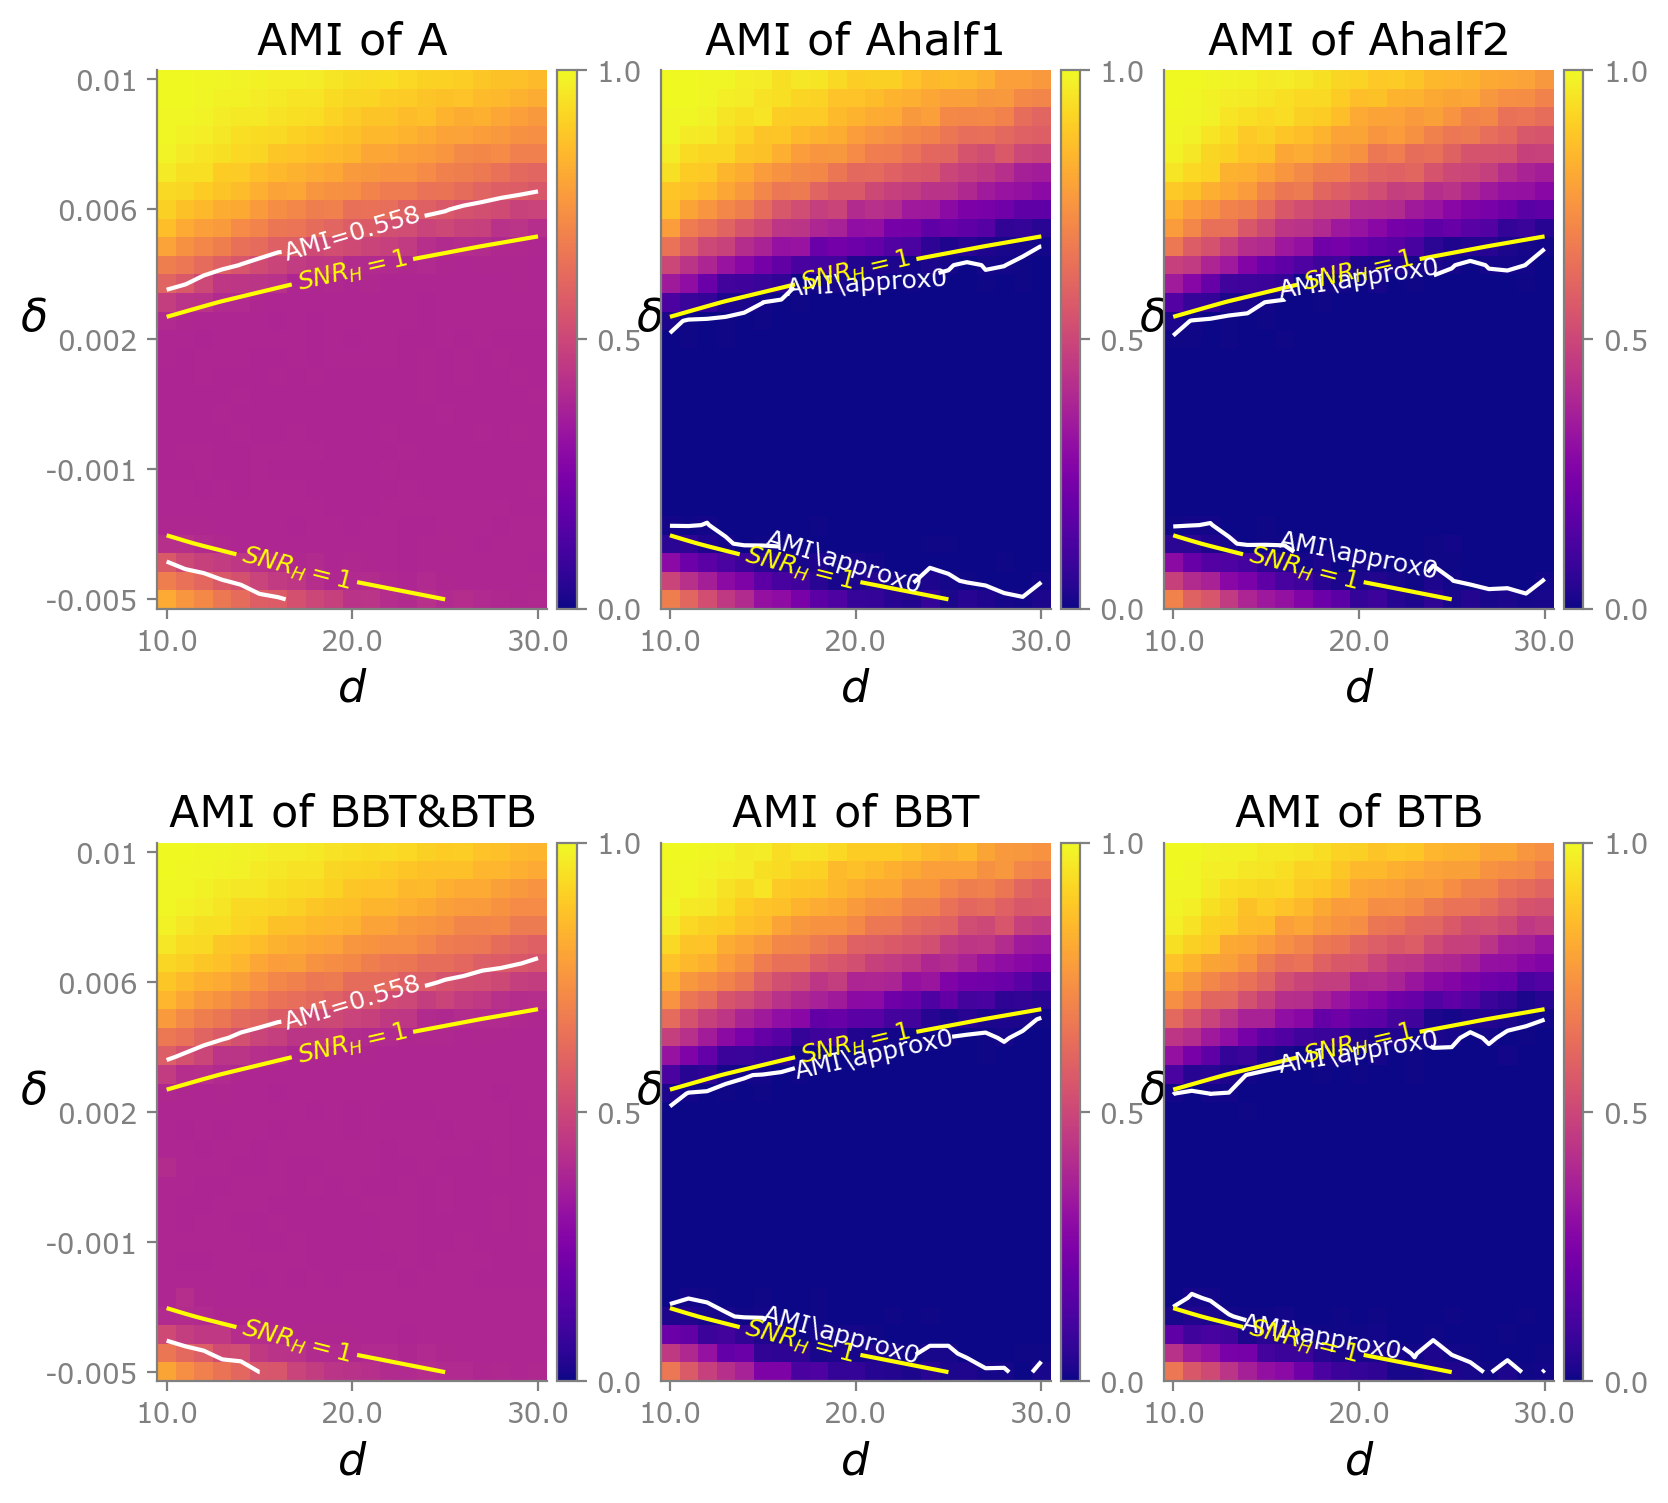

In [20]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 9.2))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_Aami = color_imshow_2d(plot_ds, plot_deltas, A_ami, z_center=zcenter, title="AMI of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min A ami={np.min(np.abs(A_ami))} max A ami={np.max(np.abs(A_ami))}')


# contour_data(plot_Aami, ax, levels=[A_ami_baseline], fmt={A_ami_baseline: rf'AMI={A_ami_baseline}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalf1ami = color_imshow_2d(plot_ds, plot_deltas, Ahalf1_ami, z_center=zcenter, title="AMI of primary", xlabel=r'$d$', ylabel=r'', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_Ahalf1ami, ax, levels=[1e-2], fmt={1e-2: rf'AMI\sim{0}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalf2ami = color_imshow_2d(plot_ds, plot_deltas, Ahalf2_ami, z_center=zcenter, title="AMI of secondary", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_Ahalf2ami, ax, levels=[1e-2], fmt={1e-2: rf'AMI\sim{0}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Combineami = color_imshow_2d(plot_ds, plot_deltas, Combine_ami, z_center=zcenter, title=r"AMI of $BB^T+B^TB$", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# contour_data(plot_Combineami, ax, levels=[A_ami_baseline], fmt={A_ami_baseline: rf'AMI={A_ami_baseline}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BBTami = color_imshow_2d(plot_ds, plot_deltas, BBT_ami, z_center=zcenter, title=r"AMI of BB^T", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_BBTami, ax, levels=[1e-2], fmt={1e-2: rf'AMI\sim{0}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BTBami = color_imshow_2d(plot_ds, plot_deltas, BTB_ami, z_center=zcenter, title=r"AMI of B^TB", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_BTBami, ax, levels=[1e-2], fmt={1e-2: rf'AMI\sim{0}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

save_path = "./_Figure/Bipartite/" + "WNBWBHspectrum.pdf"
plt.savefig(save_path, dpi=600)

ami difference between BBT&BTB and A \in (-0.049918999999999936, 0.02238699999999999)
ami difference between BBT and Ahalf1 \in (-0.117044, 0.011587)
ami difference between BTB and Ahalf2 \in (-0.11651699999999998, 0.010131999999999995)


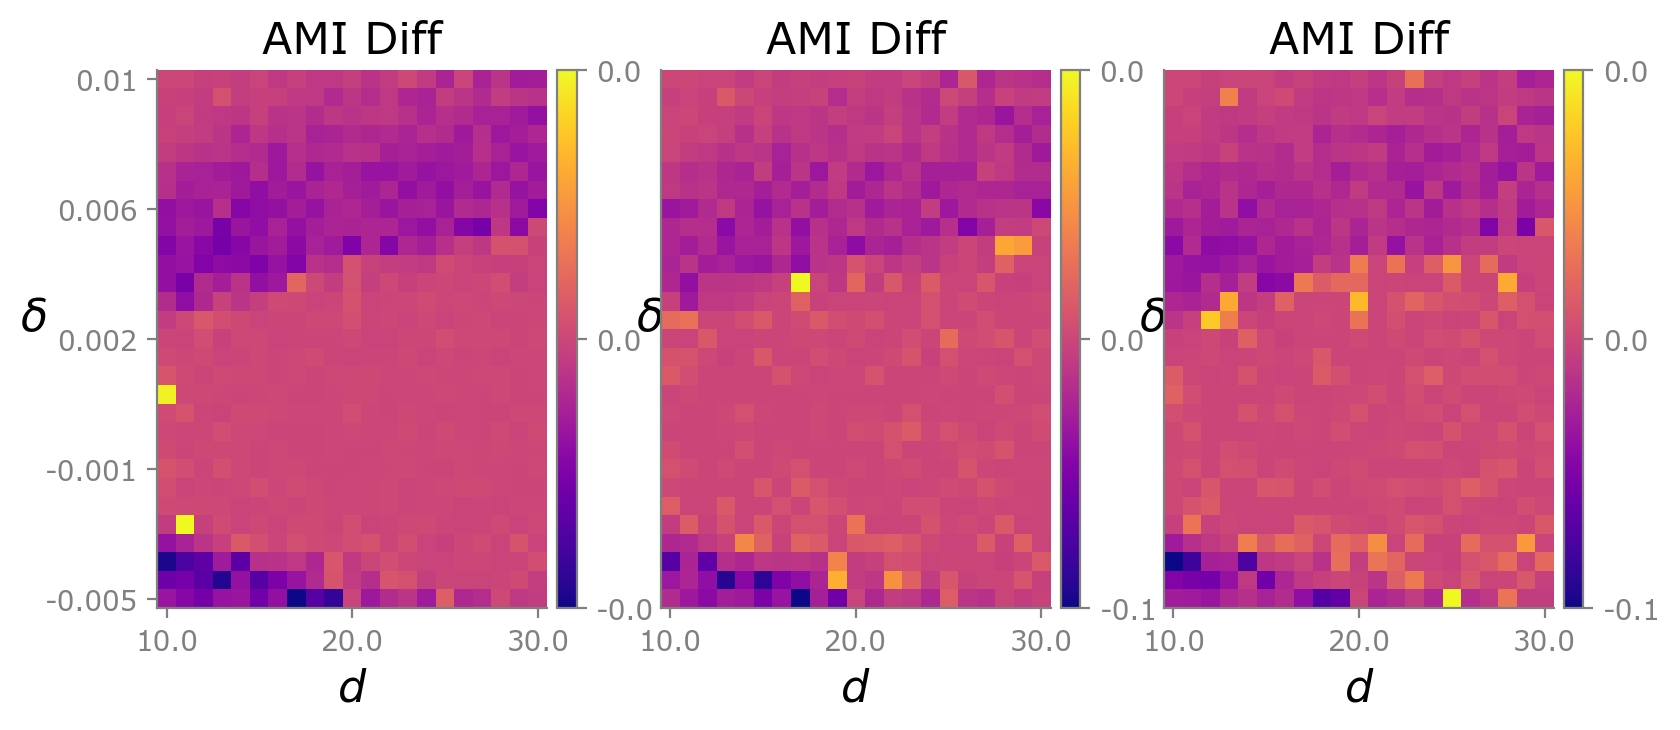

In [25]:
fig = plt.figure(figsize=(9.2, 9.2))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, Combine_ami-A_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
print(rf'ami difference between BBT&BTB and A \in ({np.min(Combine_ami-A_ami)}, {np.max(Combine_ami-A_ami)})')

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, BBT_ami-Ahalf1_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, set_yticks=False, ytickprecision=3)
print(rf'ami difference between BBT and Ahalf1 \in ({np.min(BBT_ami-Ahalf1_ami)}, {np.max(BBT_ami-Ahalf1_ami)})')

row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, BTB_ami-Ahalf2_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, set_yticks=False, ytickprecision=3)
print(rf'ami difference between BTB and Ahalf2 \in ({np.min(BTB_ami-Ahalf2_ami)}, {np.max( BTB_ami-Ahalf2_ami)})')

# Weight Bethe Hessian corrected

In [4]:
# For big n
n1 = n2 = 3000
k1 = k2 = 3
WithlambdaB = True
Htype=0
fileID = 'amiExp24.6.12' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroupsWBH_correctWBH'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
addfileID = 'amiExp24.6.22' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroupsWBH_correctWBH_40more'
add_load_path = "./result/detectabilityBipartite/" + addfileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, add_path=add_load_path, num_result=12)

A_ami, A_numGroup, Ahalf1_ami, Ahalf1_numGroup, Ahalf2_ami, Ahalf2_numGroup, BBT_ami, BBT_numGroup, BTB_ami, BTB_numGroup, Combine_ami, Combine_numGroup = \
results[0], results[1], results[2], results[3], results[4], results[5], results[6], results[7], results[8], results[9], results[10], results[11]

Additional result adding...


min A ami=0.386087 max A ami=0.9992599999999997


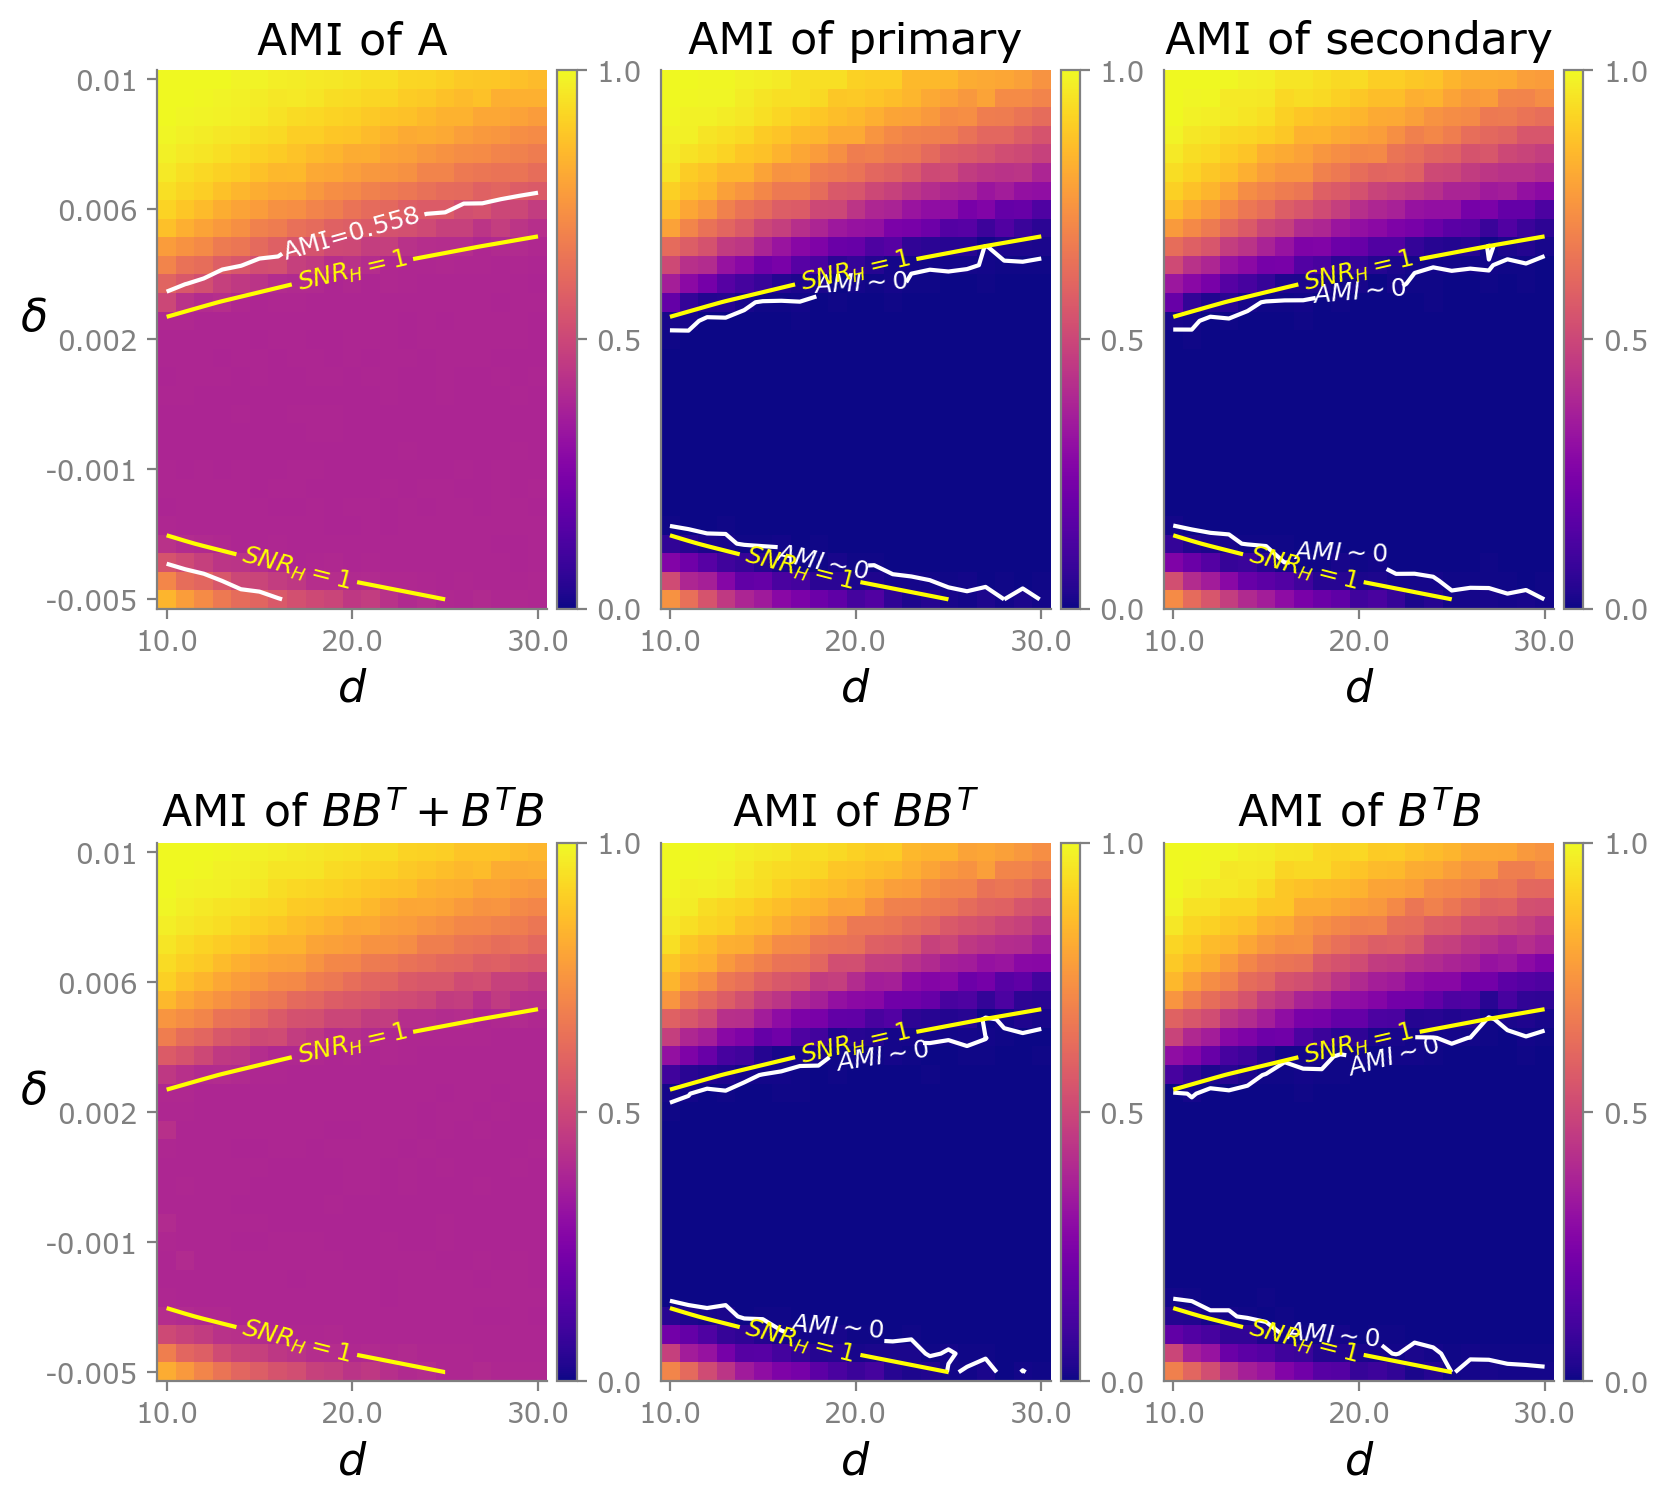

In [19]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 9.2))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_Aami = color_imshow_2d(plot_ds, plot_deltas, A_ami, z_center=zcenter, title="AMI of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min A ami={np.min(np.abs(A_ami))} max A ami={np.max(np.abs(A_ami))}')


contour_data(plot_Aami, ax, levels=[A_ami_baseline], fmt={A_ami_baseline: rf'AMI={A_ami_baseline}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalf1ami = color_imshow_2d(plot_ds, plot_deltas, Ahalf1_ami, z_center=zcenter, title="AMI of primary", xlabel=r'$d$', ylabel=r'', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_Ahalf1ami, ax, levels=[1e-2], fmt={1e-2: rf'$AMI\sim{0}$'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalf2ami = color_imshow_2d(plot_ds, plot_deltas, Ahalf2_ami, z_center=zcenter, title="AMI of secondary", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_Ahalf2ami, ax, levels=[1e-2], fmt={1e-2: rf'$AMI\sim{0}$'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Combineami = color_imshow_2d(plot_ds, plot_deltas, Combine_ami, z_center=zcenter, title=r"AMI of $BB^T+B^TB$", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# contour_data(plot_Combineami, ax, levels=[A_ami_baseline], fmt={A_ami_baseline: rf'AMI={A_ami_baseline}'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BBTami = color_imshow_2d(plot_ds, plot_deltas, BBT_ami, z_center=zcenter, title=r"AMI of $BB^T$", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_BBTami, ax, levels=[1e-2], fmt={1e-2: rf'$AMI\sim{0}$'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BTBami = color_imshow_2d(plot_ds, plot_deltas, BTB_ami, z_center=zcenter, title=r"AMI of $B^TB$", xlabel=r'$d$', ylabel=r'', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
contour_data(plot_BTBami, ax, levels=[1e-2], fmt={1e-2: rf'$AMI\sim{0}$'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

# save_path = "./_Figure/Bipartite/" + "FirstHtype_AMI.pdf"
# plt.savefig(save_path, dpi=600)

ami difference between BBT&BTB and A \in (-0.03352299999999997, 0.02078199999999991)
ami difference between BBT and Ahalf1 \in (-0.07365800000000003, 0.012138999999999997)
ami difference between BTB and Ahalf2 \in (-0.06516499999999997, 0.013039000000000004)


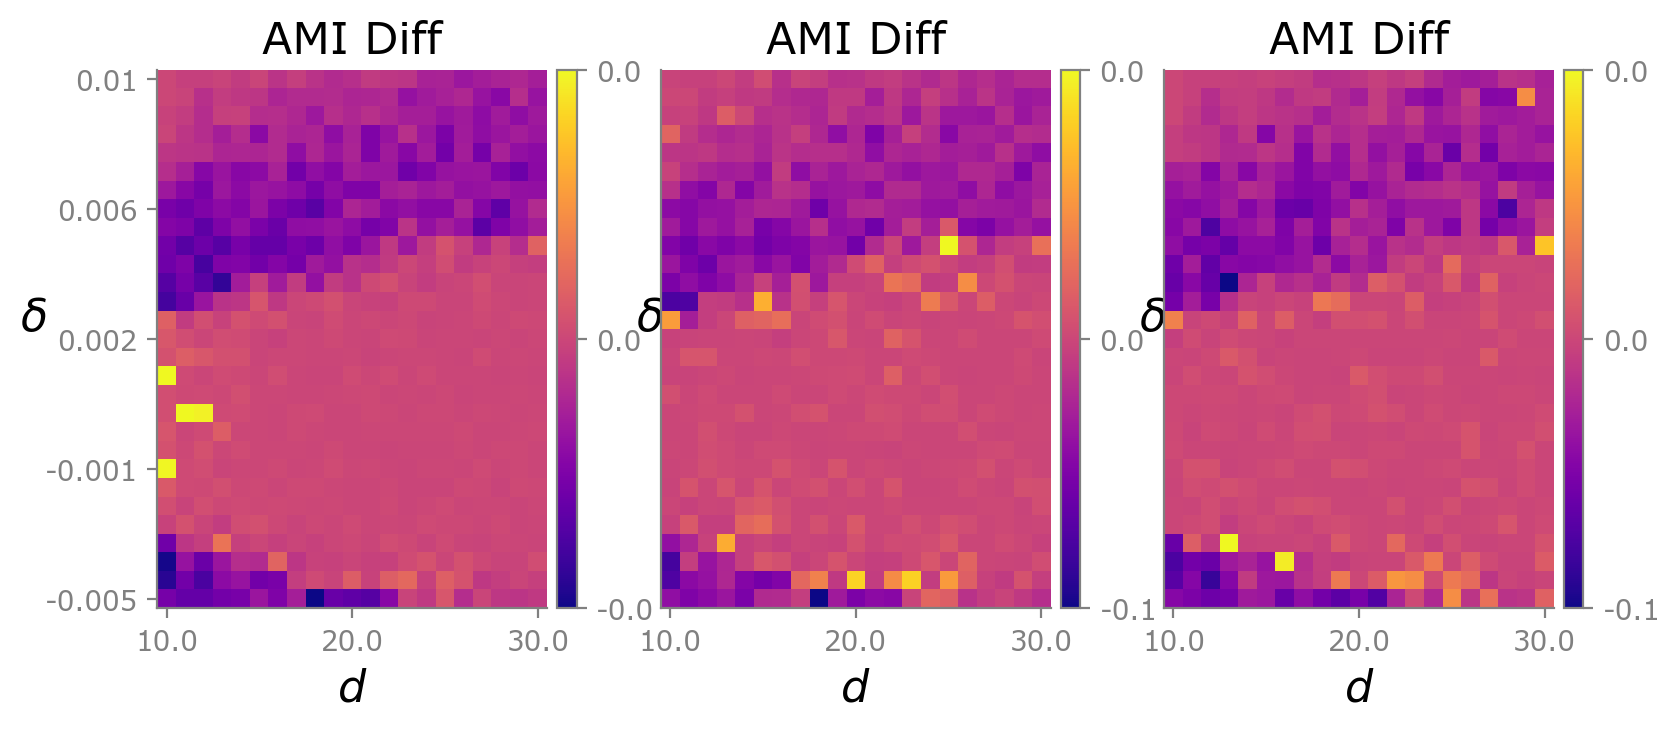

In [6]:
fig = plt.figure(figsize=(9.2, 9.2))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, Combine_ami-A_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
print(rf'ami difference between BBT&BTB and A \in ({np.min(Combine_ami-A_ami)}, {np.max(Combine_ami-A_ami)})')

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, BBT_ami-Ahalf1_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, set_yticks=False, ytickprecision=3)
print(rf'ami difference between BBT and Ahalf1 \in ({np.min(BBT_ami-Ahalf1_ami)}, {np.max(BBT_ami-Ahalf1_ami)})')

row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_=color_imshow_2d(plot_ds, plot_deltas, BTB_ami-Ahalf2_ami, z_center=0, title="AMI Diff", xlabel=r'$d$', ylabel=r'$\delta$', 
                            cmap=cmap, ax=ax, fig=fig, set_yticks=False, ytickprecision=3)
print(rf'ami difference between BTB and Ahalf2 \in ({np.min(BTB_ami-Ahalf2_ami)}, {np.max( BTB_ami-Ahalf2_ami)})')